# IntroStat Week 4 

Welcome to the 4th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 4.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Simulation: Distribution of the sample mean

In [2]:
# Plot histogram of 10 random values (normally distributed)

# 'True' values in theoretical population
mu = 178
sigma = 12

# size of sample
n = 10

In [3]:
# Draw 10 random numbers
x = stats.norm.rvs(mu, sigma, size=n)
print(x)

[189.74255081 177.53670382 191.25338665 199.83691546 186.29236701
 163.74742139 192.1139207  203.11466051 203.95929275 175.29141813]


171.3959788633524


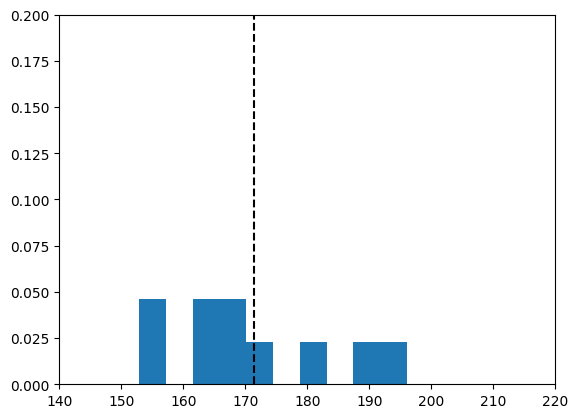

In [4]:
# calculate sample mean and plot
x = stats.norm.rvs(mu, sigma, size=n)
print(x.mean())

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(140,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black")
plt.show()

In [5]:
# Repeat 100 times and plot histogram of the mean values

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
xbar = mat.mean(axis=0)

print(xbar)

[177.49686501 174.30688442 185.88258124 169.13431782 187.20415787
 180.77081143 176.05495799 176.60802911 173.0912037  181.329503
 176.84240726 176.48976867 170.67652932 177.68073161 169.69194468
 179.65183786 176.68895197 175.55646273 178.17257918 179.64737073
 172.47539249 178.18692337 177.20835831 175.398826   175.34294948
 175.9970511  181.25401117 180.46498301 178.73405108 171.76648247
 180.49202049 173.40124114 179.86277654 181.17600347 175.21613876
 173.87472661 172.06833366 179.21719541 174.72095672 173.09559682
 173.17894    176.87945006 177.97982372 166.89569167 171.84779876
 172.91483759 176.1568665  182.76960715 180.34191636 173.76476858
 174.35876568 166.93599479 180.48237916 179.15685402 181.60563465
 185.03817313 180.08169487 178.72033995 183.16702572 177.37276332
 169.85799205 183.37527431 173.64142029 172.76640348 171.13864211
 177.86041015 183.30027592 180.19944553 176.89154594 176.72825722
 176.93522561 179.64274365 178.39408223 175.70432642 178.34992371
 182.7388308

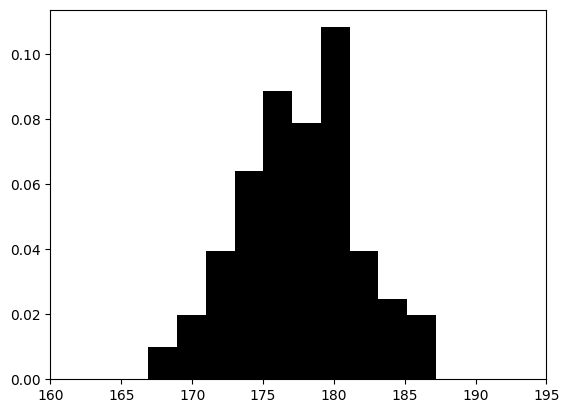

In [6]:
# Plot histogram of the mean values
plt.hist(xbar, density=True, color="black")
plt.xlim(160,195)
plt.show()


### t-distribution

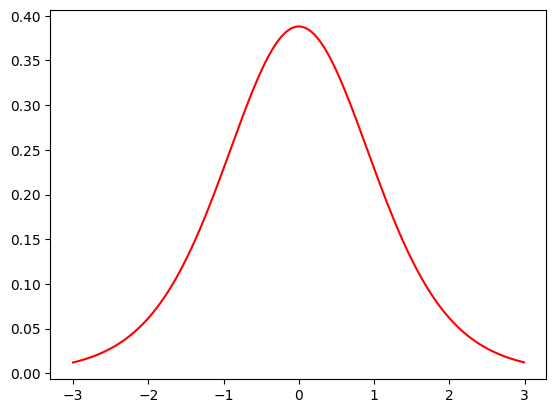

In [7]:
# Plot the t-distribution
plt.plot(np.arange(-3,3,.01), stats.t.pdf(np.arange(-3,3,.01), df=9), color="red")
plt.show()

#np.arange(start, stop, step): Creating 600 values between -3 and 3, which are x-axis limits
#stats.t.pdf(np.arange(-3, 3, .01), df=9) calculates the probability density function (PDF) 
# of the t-distribution for each value in the array generated by np.arange(-3, 3, .01)

### Example: find correct quantile in t(9)-distribution

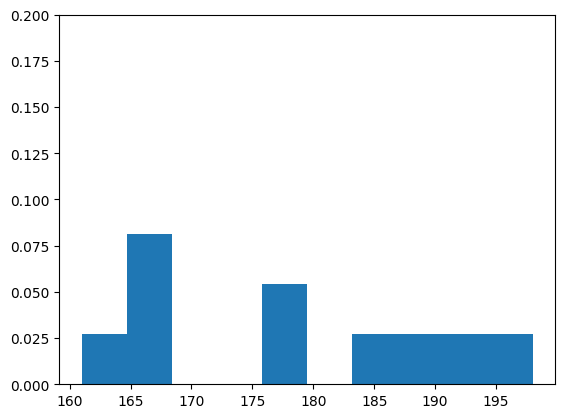

In [8]:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)
plt.ylim(0,.2)
plt.show()

In [9]:
# calculate mean (xbar) and sample standard deviation (S)
xbar = height_data.mean()
s = height_data.std(ddof=1)
print(xbar)
print(s)

178.0
12.211106056009468


### Critical values of Student's t distribution with ν degrees of freedom

When, $\alpha = 0.1$, $90\%$ confidence level<br>
$\alpha/2 = 0.05$
$1-\alpha/2 = 1-0.05=0.95$

When, $\alpha = 0.05$, $95\%$ confidence level<br>
$\alpha/2 = 0.05/2=0.025$
$1-\alpha/2 = 1-0.025=0.975$

When, $\alpha = 0.01$, $99\%$ confidence level<br>
$\alpha/2 = 0.01/2=0.005$
$1-\alpha/2 = 1-0.005=0.995$

Typical or default confidence level is $\alpha = 0.05$, $95\%

In [10]:
#For significance level 0.1 (df=9), critical values of Student's t distribution with 9 degrees of freedom
t_lower = stats.t.ppf(q=0.05,df=9)
t_upper = stats.t.ppf(q=0.95,df=9)
print("For significance level 0.1 (df=9), The lower limit is " + str(round(t_lower,2))
      + " and the upper limit is " + str(round(t_upper,2)))

#For significance level 0.05(df=9), critical values of Student's t distribution with 9 degrees of freedom
t_lower = stats.t.ppf(q=0.025,df=9)
t_upper = stats.t.ppf(q=0.975,df=9)
print("For significance level 0.05 (df=9), The lower limit is " 
      + str(round(t_lower,2))+ " and the upper limit is " + str(round(t_upper,2)))

#For significance level 0.01(df=9), critical values of Student's t distribution with 9 degrees of freedom
t_lower = stats.t.ppf(q=0.005,df=9)
t_upper = stats.t.ppf(q=0.995,df=9)
print("For significance level 0.01 (df=9), The lower limit is " 
      + str(round(t_lower,2))+ " and the upper limit is " + str(round(t_upper,2)))

For significance level 0.1 (df=9), The lower limit is -1.83 and the upper limit is 1.83
For significance level 0.05 (df=9), The lower limit is -2.26 and the upper limit is 2.26
For significance level 0.01 (df=9), The lower limit is -3.25 and the upper limit is 3.25


### $95\%$ Interval Estimate for students' height sample data

In [11]:
# 95% interval estimte for students' height sample data

height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xbar = height_data.mean()
s = height_data.std(ddof=1)

t_lower = stats.t.ppf(q=0.025,df=9)
t_upper = stats.t.ppf(q=0.975,df=9)

mu_lower = xbar + t_lower*s/np.sqrt(10)
mu_upper = xbar + t_upper*s/np.sqrt(10)
print([round(mu_lower,2), round(mu_upper,2)])

[169.26, 186.74]


### Visualize the confidence interval

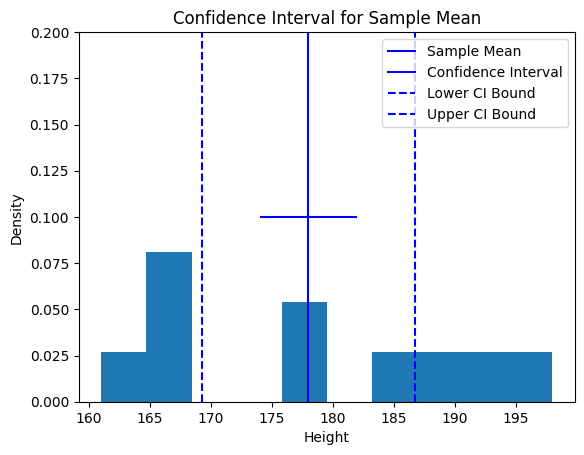

In [12]:
# Visualize the confidence interval
xrange = np.arange(140, 220, .1)
plt.hist(height_data, density=True)

# Sample mean line
plt.axvline(xbar, linestyle='-', color="blue", ymin=0, ymax=1, label="Sample Mean")

# Confidence interval range
plt.plot([xbar - s/np.sqrt(10), xbar + s/np.sqrt(10)], [0.1, 0.1], linestyle='-', color="blue", label="Confidence Interval")

# Lower bound of confidence interval
plt.axvline(mu_lower, linestyle='--', color="blue", ymin=0, ymax=1, label="Lower CI Bound")

# Upper bound of confidence interval
plt.axvline(mu_upper, linestyle='--', color="blue", ymin=0, ymax=1, label="Upper CI Bound")

# Set axis limits and labels
plt.ylim(0, .2)
plt.xlabel("Height")
plt.ylabel("Density")
plt.title("Confidence Interval for Sample Mean")

# Add legend to label the lines
plt.legend()

# Show plot
plt.show()


We can also calcualte a 99%-confidence interval for our mean student height

Will it be wider or narrower ?

Try to calculate the 99% interval using Python

### Simulation: Distribution of the sample variance

61.64793550975959
144


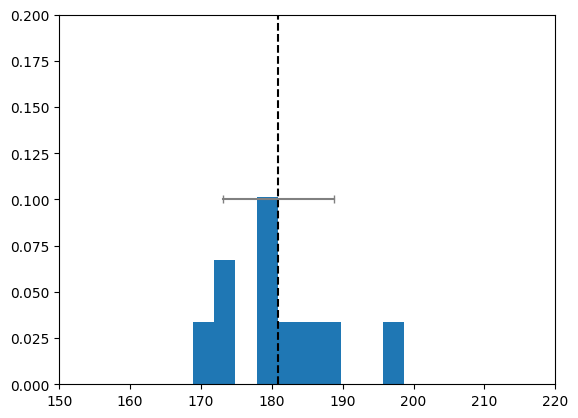

In [13]:
# Run this multiple times and observe changes in the plot

# Back to simulation of student heights
mu = 178
sigma = 12
n = 10

# calculate sample VARIANCE
x = stats.norm.rvs(mu, sigma, size=n)
print(x.var())
print(sigma**2)

# Plot histogram 
plt.hist(x, density=True)
plt.xlim(150,220)
plt.ylim(0,0.20)
plt.axvline(x.mean(), linestyle='--', color="black") #verticle line
plt.plot([x.mean()-x.std(),x.mean()+x.std()], [.1, .1], '|', linestyle="-", color='grey')
plt.show()

Not only sample mean changes for each simulation - also the sample variance changes.

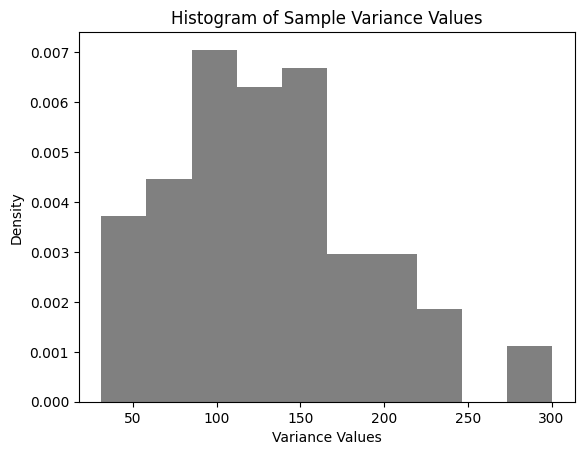

In [14]:
# Repeat 100 times and plot histogram of the variance values

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Draw (10 x 100) random numbers
mat = stats.norm.rvs(mu, sigma, size=(n,100))

# Calculate sample mean of each column 
s2 = mat.var(axis=0)

# Adding labels and title to the plot
plt.title("Histogram of Sample Variance Values")
plt.xlabel("Variance Values")
plt.ylabel("Density")

plt.hist(s2, density=True, color="grey")
plt.show()

The variance is always positive and does not follow a normal distribution. <br>
The distribution of variance is not symmetrical. 

### Example: Variance of student heights 

In [15]:
# A random sample of n = 10 student height have the following sample mean and variance:
height_data = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])
xbar = height_data.mean()
s = height_data.std(ddof=1)
n=10

var_hat = s**2
print(var_hat)

149.11111111111111


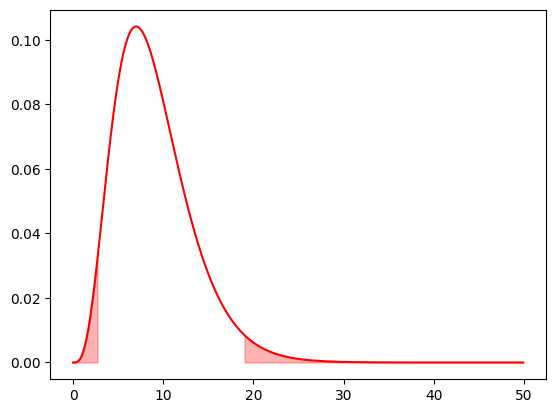

In [16]:
# plot chi-square distribution with n-1 = 9 degrees of freedom
plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='red', alpha=0.3)
plt.show()

In [17]:
#chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
#chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

chi2_lower = stats.chi2.ppf(0.025, df=(n-1))
chi2_upper = stats.chi2.ppf(0.975, df=(n-1))

print([round(chi2_lower,4), round(chi2_upper,4)])

[2.7004, 19.0228]


Confidence interval for the variance

In [18]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_upper) # lower limit of the interval
print((n-1)*var_hat/chi2_lower) # upper limit of the interval

149.11111111111111
70.5470420606106
496.965345188078


Confidence interval for the standard deviation

In [19]:
# confidence interval for the standard deviation
print("Standard deviation: " + str(np.sqrt(var_hat))) # notice - square root
print("95% confidence interval for the standard deviation")
print(np.sqrt((n-1)*var_hat/chi2_upper))
print(np.sqrt((n-1)*var_hat/chi2_lower))

Standard deviation: 12.211106056009468
95% confidence interval for the standard deviation
8.399228658669236
22.29271955567732


Notice the interval is not symmetric

### CLT in action

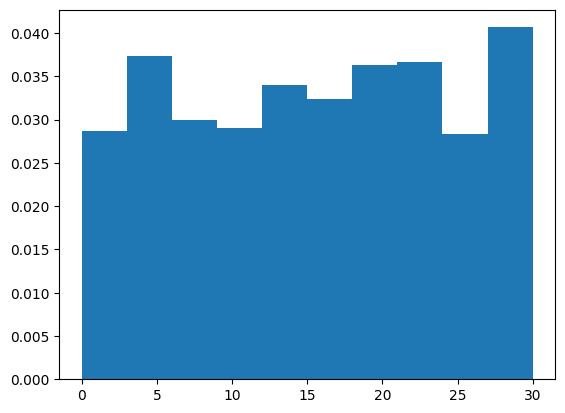

In [20]:
n=1
k=1000
u = stats.uniform.rvs(loc=0, scale=30, size=(n,k))

mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

We can also try with another distribution

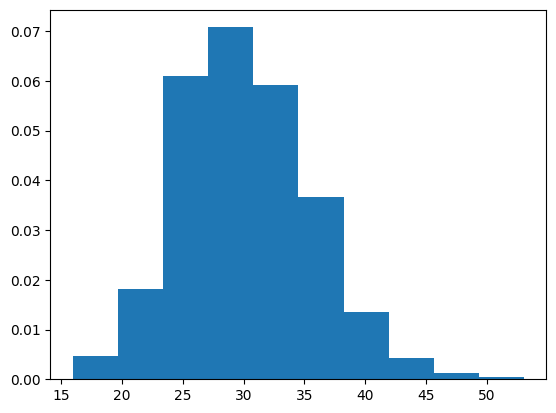

In [21]:
n=30
k=1000
u = stats.expon.rvs(loc=0, scale=30, size=(n,k))
mean_values = u.mean(axis=0)

plt.hist(mean_values, density=True)
plt.show()

Now increase n to 2,3,6,30

### Example: Exam question from 2016 

In [22]:
grades = np.array([2, 4, 7, 10, 12])
count = np.array([22, 78, 84, 72, 24])
#plt.bar(grades,count)
#plt.show()

In [23]:
# calculate average (mean) grade:
total_grade = np.sum(grades*count)
avg_grade = total_grade/280
print("Average grade: " + str(round(avg_grade,2)))

Average grade: 6.97


The formula for sample variance ($ s^2 $) is:

$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Where:
- $ n $ is the sample size.
- $ x_i $ represents each individual observation.
- $ \bar{x} $ is the sample mean. 
  
For this question, the frequncy or count has to be taken into consideration

In [24]:
grades-avg_grade

array([-4.97142857, -2.97142857,  0.02857143,  3.02857143,  5.02857143])

In [25]:
# calculate variance of grades:

var_grade = 1/(280-1)* np.sum(count * (grades-avg_grade)**2)
print("Variance of grade: ")
print(round(var_grade,2))

Variance of grade: 
8.96


In [26]:
avg_grade_standard_error = np.sqrt(var_grade)/np.sqrt(280)
print(avg_grade_standard_error)

0.17888298474012831


In [27]:
t_upper = stats.t.ppf(0.975, df=280-1)
print(t_upper)

1.968503126548004


In [28]:
print(avg_grade - t_upper*avg_grade_standard_error)
print(avg_grade + t_upper*avg_grade_standard_error)

6.61929685668139
7.323560286175753


### Example: Production of tablets 

In [29]:
# A random sample of n = 20 have the following sample mean and variance:

n = 20
mu_hat = 1.01
var_hat = 0.07**2

print(var_hat)

0.004900000000000001


We need to give a confidence interval on the estimate of var_hat

We choose a 95% confidence interval

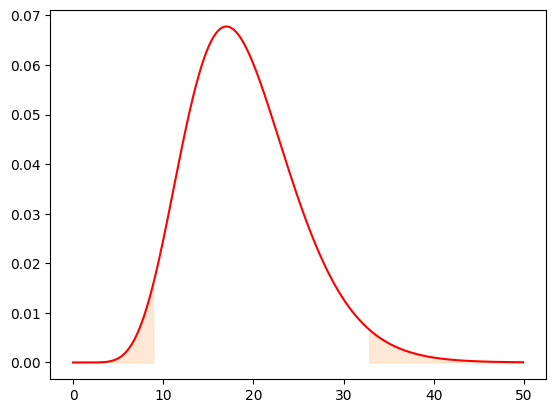

In [30]:
# plot chi-square distribution and visualise the limits of chi^2

# we need the distribution of n-1 = 19 degrees of freedom

plt.plot(np.arange(0,50,.1), stats.chi2.pdf(np.arange(0,50,.1), df=(n-1), loc=0, scale=1), color="red")
xint = np.arange(0, stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1), .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
xint = np.arange(stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1), 50, .01)
plt.fill_between(xint, stats.chi2.pdf(xint, df=(n-1), loc=0, scale=1), color='peachpuff', alpha=0.6)
plt.show()

In [31]:
chi2_lower = stats.chi2.ppf(0.025, df=(n-1), loc=0, scale=1)
chi2_upper = stats.chi2.ppf(0.975, df=(n-1), loc=0, scale=1)

print([chi2_lower,chi2_upper])

[8.906516481987971, 32.85232686172969]


In [32]:
# confidence interval for the variance
print(var_hat)
print((n-1)*var_hat/chi2_lower)
print((n-1)*var_hat/chi2_upper)

0.004900000000000001
0.010453020570756269
0.002833893635353239


### Variance
A $ 100(1-\alpha)\% $ confidence interval for the variance $ \sigma^2 $ is given by:

$
\left[ \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}};~
\frac{(n-1)s^2}{\chi^2_{\alpha/2}} \right],
$

where the quantiles come from a $ \chi^2 $ distribution with $ n - 1 $ degrees of freedom.

### Standard Deviation
A $ 100(1-\alpha)\% $ confidence interval for the standard deviation $ \sigma $ is:

$
\left[ \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}};~
\sqrt{\frac{(n-1)s^2}{\chi^2_{\alpha/2}}} \right].
$


In [33]:
# confidence interval for the standard deviation
print(np.sqrt(var_hat))
print("Confidence Interval Estimates for the Variance of the active ingredient-concentration :")
ll = np.sqrt((n-1)*var_hat/chi2_upper)
ul = np.sqrt((n-1)*var_hat/chi2_lower)
#print(np.sqrt((n-1)*var_hat/chi2_upper))
#print(np.sqrt((n-1)*var_hat/chi2_lower))
print(round(ll,2)) 
print(round(ul,2))

0.07
Confidence Interval Estimates for the Variance of the active ingredient-concentration :
0.05
0.1
